In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import folium
import webbrowser



In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
data_useful = data[subset:=['Longitude', 'Latitude', 'MedInc']].copy()
X_train, X_test = train_test_split(data_useful, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


Creamos un ciclo for para analizar el desempenio del modelo con diferentes valores de k, tomando en cuenta que lo que buscamos es poder analizar como esta formando los clusters e identificar que clasificacion es mas conveniente, tanto para la interpretacion humana como para el modelo. 

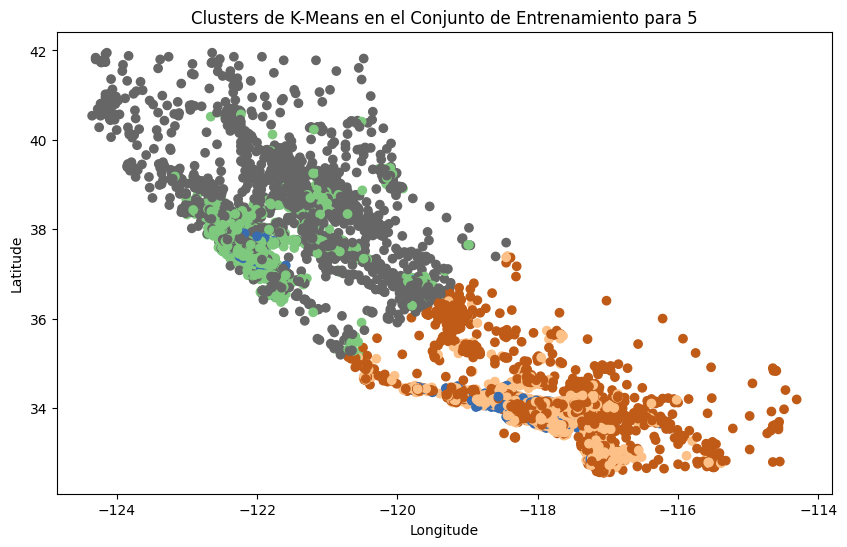

     Latitude  Longitude     MedInc
0 -121.844161  37.642383   5.309657
1 -117.966665  33.818937   5.140065
2 -119.154213  34.825724  10.161786
3 -117.940107  33.946544   2.668770
4 -121.536135  38.054142   2.693486


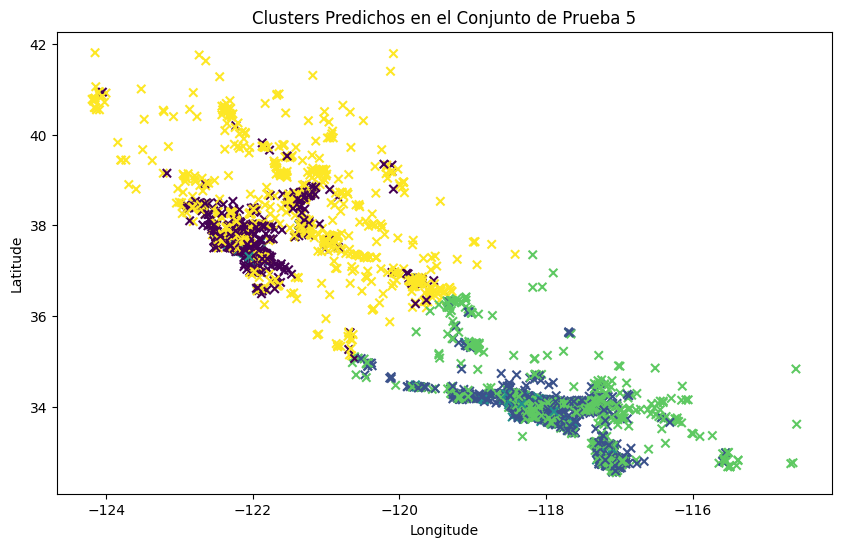

Accuracy: 0.9861918604651163
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       581
           1       0.99      0.97      0.98       925
           2       1.00      0.97      0.98       119
           3       0.98      1.00      0.99      1403
           4       0.98      0.99      0.99      1100

    accuracy                           0.99      4128
   macro avg       0.99      0.98      0.98      4128
weighted avg       0.99      0.99      0.99      4128



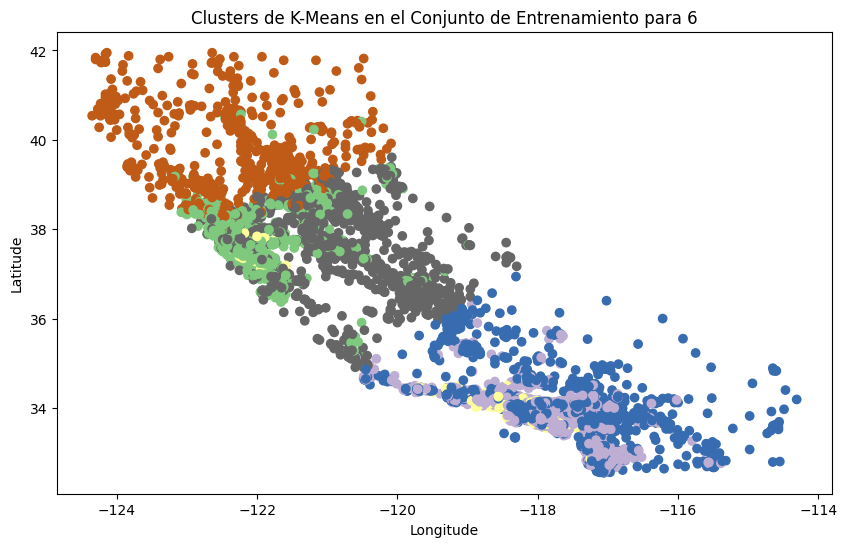

     Latitude  Longitude     MedInc
0 -121.884437  37.677247   5.301598
1 -117.974648  33.819790   5.156025
2 -119.155713  34.828510  10.172231
3 -117.872022  33.873071   2.682864
4 -122.317282  39.574418   2.379842
5 -121.189819  37.497708   2.774864


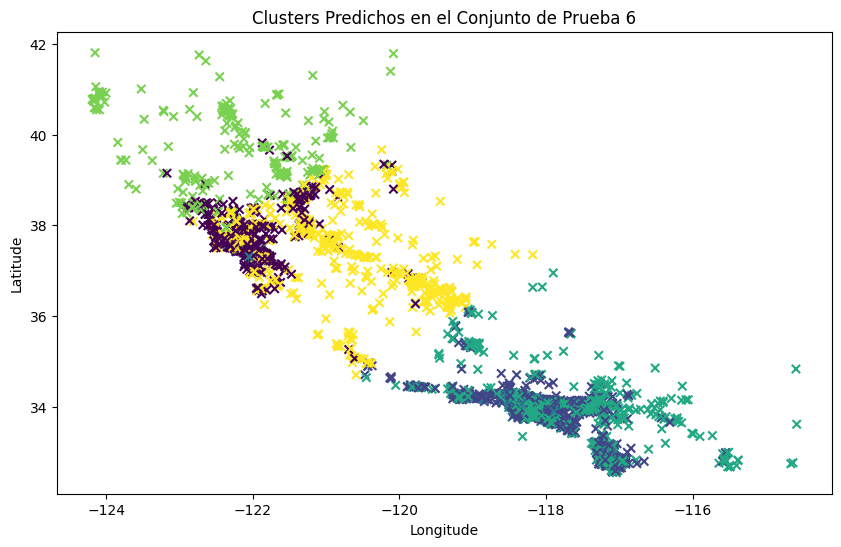

Accuracy: 0.9784399224806202
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       583
           1       0.99      0.97      0.98       917
           2       1.00      0.97      0.98       119
           3       0.98      1.00      0.99      1368
           4       0.97      0.91      0.94       269
           5       0.95      0.99      0.97       872

    accuracy                           0.98      4128
   macro avg       0.98      0.97      0.97      4128
weighted avg       0.98      0.98      0.98      4128



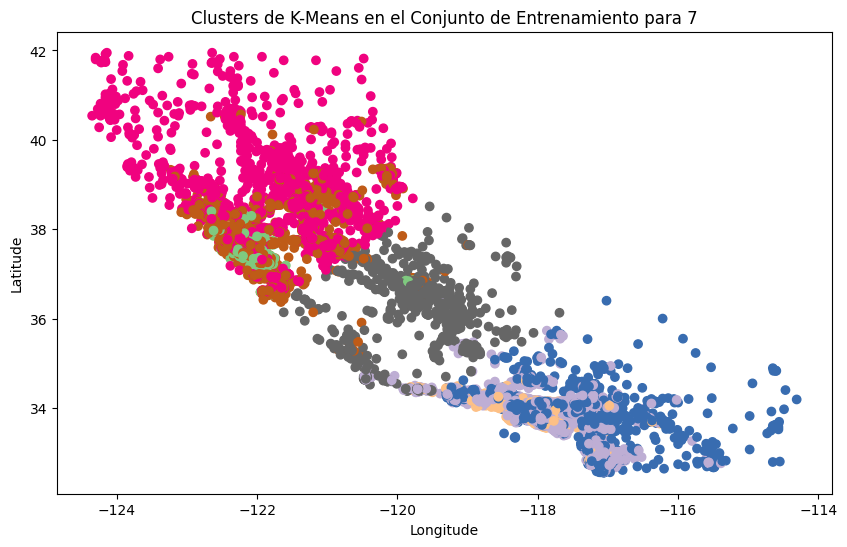

     Latitude  Longitude    MedInc
0 -121.949500  37.540367  8.285141
1 -117.961444  33.815729  4.970803
2 -118.049422  33.830680  8.966523
3 -117.762950  33.764227  2.665260
4 -121.820627  38.395563  2.545708
5 -121.840074  37.707892  4.674670
6 -119.665403  36.030778  2.572543


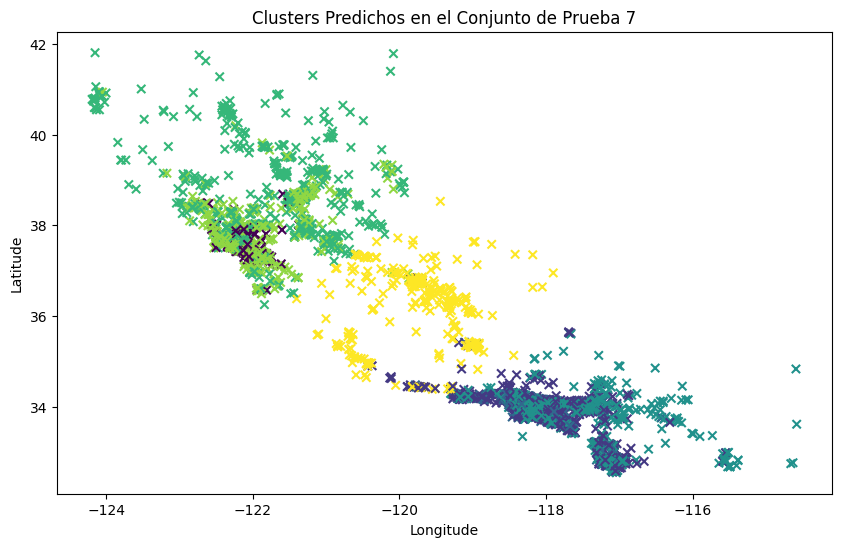

Accuracy: 0.9830426356589147
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97       119
           1       0.99      0.97      0.98       895
           2       1.00      0.97      0.99       148
           3       0.98      1.00      0.99      1242
           4       0.98      0.99      0.99       781
           5       0.98      0.98      0.98       610
           6       0.98      0.98      0.98       333

    accuracy                           0.98      4128
   macro avg       0.99      0.97      0.98      4128
weighted avg       0.98      0.98      0.98      4128



In [3]:
for k in range(5,8):
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    X_train['Cluster'] = kmeans.labels_
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train['Longitude'], X_train['Latitude'], c=X_train['Cluster'], cmap='Accent')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Clusters de K-Means en el Conjunto de Entrenamiento para {k}')
    plt.show()
    
    centroids = kmeans.cluster_centers_

    centroids_denorm = scaler.inverse_transform(centroids)

    centroids_df = pd.DataFrame(centroids_denorm, columns=['Latitude', 'Longitude', 'MedInc'])
    print(centroids_df)
    
    test_clusters = kmeans.predict(X_test_scaled)

    X_test['Cluster'] = test_clusters

    plt.figure(figsize=(10, 6))
    plt.scatter(X_test['Longitude'], X_test['Latitude'], c=X_test['Cluster'], cmap='viridis', marker='x')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Clusters Predichos en el Conjunto de Prueba {k}')
    plt.show()
    
    
    X_train_supervised = X_train[['Latitude', 'Longitude', 'MedInc']]
    y_train_supervised = X_train['Cluster']

    X_test_supervised = X_test[['Latitude', 'Longitude', 'MedInc']]
    y_test_supervised = X_test['Cluster']

    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train_supervised, y_train_supervised)
    y_pred = clf.predict(X_test_supervised)
    print("Accuracy:", accuracy_score(y_test_supervised, y_pred))
    print("Classification Report:\n", classification_report(y_test_supervised, y_pred))

    

Podemos ver que donde mejor se adaptan los clusters en con un k igual a 5 donde tendremos 2 divisiones geograficas para med incoma bajo 2 divisiones para med income medio y una para med income alto.

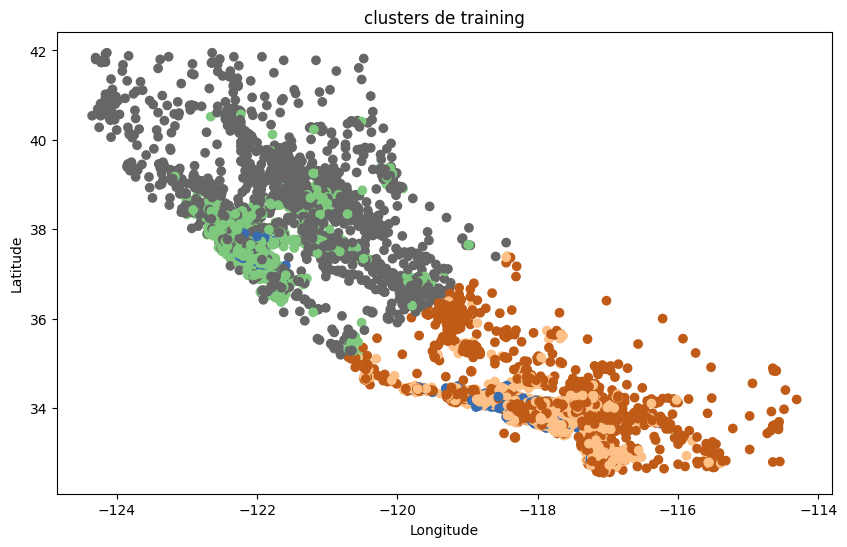

     Latitude  Longitude     MedInc
0 -121.844161  37.642383   5.309657
1 -117.966665  33.818937   5.140065
2 -119.154213  34.825724  10.161786
3 -117.940107  33.946544   2.668770
4 -121.536135  38.054142   2.693486


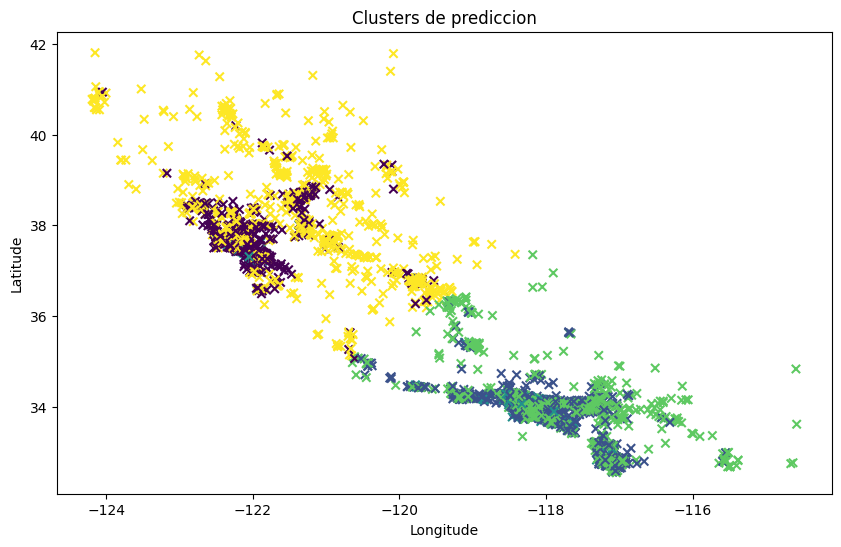

precision: 0.9861918604651163
Reporte de Clasificacion:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       581
           1       0.99      0.97      0.98       925
           2       1.00      0.97      0.98       119
           3       0.98      1.00      0.99      1403
           4       0.98      0.99      0.99      1100

    accuracy                           0.99      4128
   macro avg       0.99      0.98      0.98      4128
weighted avg       0.99      0.99      0.99      4128



In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train_scaled)
X_train['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(X_train['Longitude'], X_train['Latitude'], c=X_train['Cluster'], cmap='Accent')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('clusters de training')
plt.show()

centroids = kmeans.cluster_centers_
centroids_denorm = scaler.inverse_transform(centroids)
centroids_df = pd.DataFrame(centroids_denorm, columns=['Latitude', 'Longitude', 'MedInc'])
print(centroids_df)

test_clusters = kmeans.predict(X_test_scaled)
X_test['Cluster'] = test_clusters

plt.figure(figsize=(10, 6))
plt.scatter(X_test['Longitude'], X_test['Latitude'], c=X_test['Cluster'], cmap='viridis', marker='x')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters de prediccion')
plt.show()

X_train_supervised = X_train[['Latitude', 'Longitude', 'MedInc']]
y_train_supervised = X_train['Cluster']
X_test_supervised = X_test[['Latitude', 'Longitude', 'MedInc']]
y_test_supervised = X_test['Cluster']

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_supervised, y_train_supervised)
y_pred = clf.predict(X_test_supervised)

print("precision:", accuracy_score(y_test_supervised, y_pred))
print("Reporte de Clasificacion:\n", classification_report(y_test_supervised, y_pred))

colors = ['red', 'blue', 'green', 'purple', 'orange']
m = folium.Map(location=[X_train['Latitude'].mean(), X_train['Longitude'].mean()], zoom_start=7)

for index, row in X_train.iterrows():
    cluster_index = int(row['Cluster'])
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=f"Cluster: {cluster_index}, MedInc: {row['MedInc']}",
        color=colors[cluster_index % len(colors)],
        fill=True,
        fill_color=colors[cluster_index % len(colors)]
    ).add_to(m)

m.save('clusters_map.html')


Podemos ver que el modelo presenta buen desempenio en precision, recall y f1, esto se le adjudica al data set debido a que esta practica fue de clusterizacion, antes que de clasificacion con un modelo supervisado

In [9]:
webbrowser.open('clusters_map.html')

True

Con esto ya tenemos un numero correcto de clusters junto con un modelo de prueba de aprendizaje supervisado, seleccionamos clasificador de arbol de decision debido a la simplicidad de implementacion. 

Adicionalmente aniadimos un mapa de california para visualizar como se distribuyen los datos en nuestros clusters en forma geografica. 

Finalmente guardamos los modelos 

In [10]:
import joblib
joblib.dump(clf, r'C:\Users\wipip\OneDrive\Documentos\GitHub\UL--K-means--main\models\decision_tree_model.pkl')
joblib.dump(kmeans, r'C:\Users\wipip\OneDrive\Documentos\GitHub\UL--K-means--main\models\kmeans.pkl')


['C:\\Users\\wipip\\OneDrive\\Documentos\\GitHub\\UL--K-means--main\\models\\kmeans.pkl']